# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2887]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# to make this notebook's output stable across runs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
np.random.seed(42)

In [2888]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [2889]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

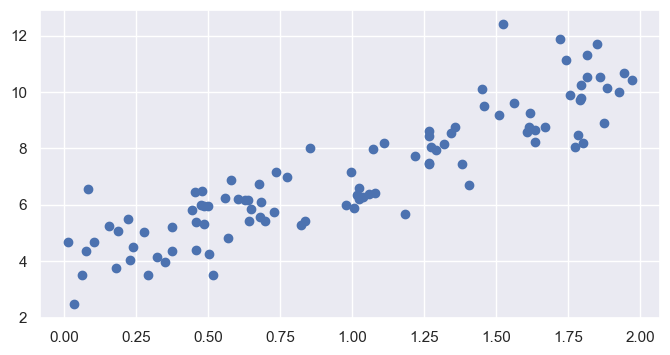

In [2890]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [2891]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [2892]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [2893]:
#X_fit[]

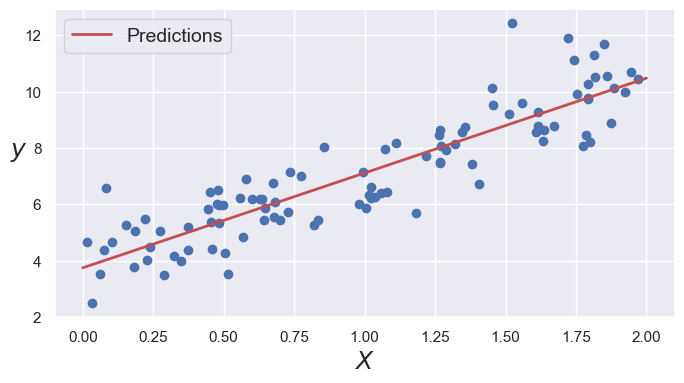

In [2894]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [2895]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [2896]:
X_new.shape

(2, 1)

In [2897]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [2898]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.30X + 3.57$

In [2899]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [2900]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

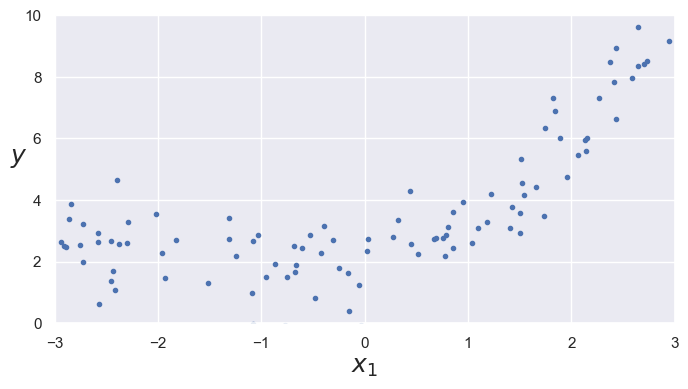

In [2901]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [2902]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [2903]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [2904]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [2905]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [2906]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [2907]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.96X +0.96X^2 + 2.19$

Plot the data and the predictions:

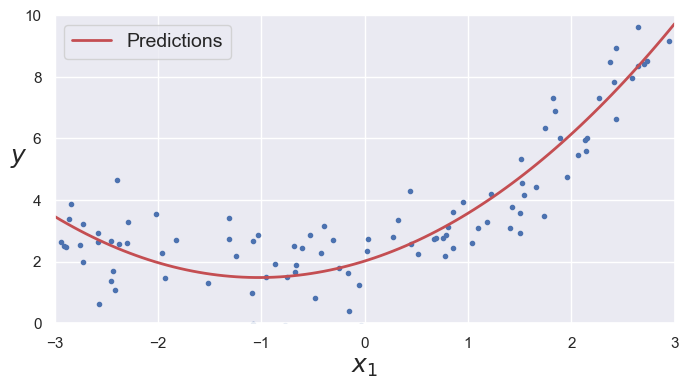

In [2908]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [2909]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [2910]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [2911]:
len(X)

1000

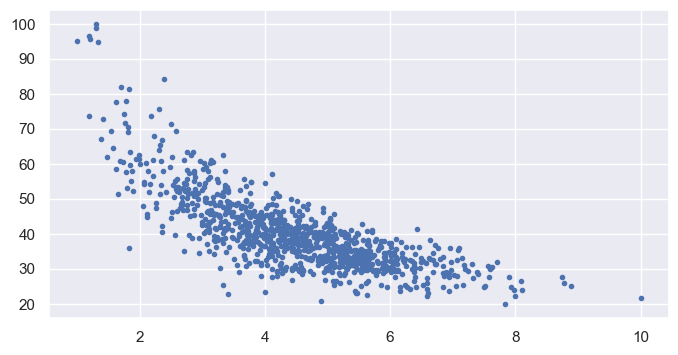

In [2912]:
plt.plot(X,y,'b.')

In [2913]:
#lineal
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

In [2914]:
linear_reg.coef_

array([-6.0333683])

In [2915]:
linear_reg.intercept_

67.03904193389238

The model estimates:

$\hat{y} = -6.03X + 67.03$

In [2916]:
y_pred = linear_reg.predict(X)

In [2917]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.921245677483368
Root Mean Squared Error: 6.871474273023592
r2_score 0.5789767558506287


C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


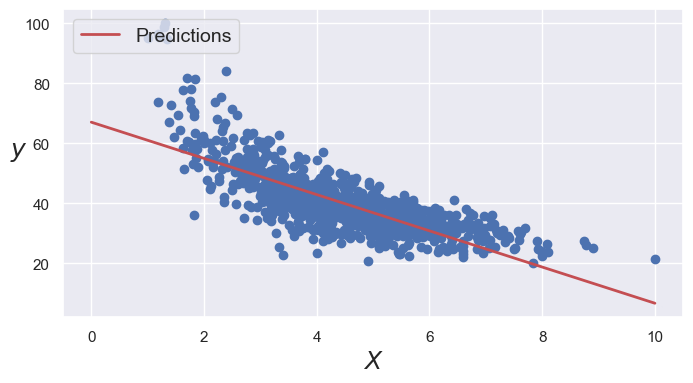

In [2918]:
# construct best fit line
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [2919]:
#polinomial

poly_transform = PolynomialFeatures(degree=2, include_bias = False)
polyX = poly_transform.fit_transform(X)

polyX


array([[  1.        ,   1.        ],
       [  1.18599365,   1.40658094],
       [  1.19149864,   1.41966901],
       ...,
       [  8.78088812,  77.10399623],
       [  8.89769971,  79.16906006],
       [ 10.        , 100.        ]])

In [2920]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX, y)

LinearRegression()

In [2921]:
poly_regression.coef_

array([-16.82425278,   1.17336718])

In [2922]:
poly_regression.intercept_

89.73719677939124

$\hat{y} =  -16.82X +1.17X^2 + 89.73$

In [2923]:
y_pred = poly_regression.predict(polyX)

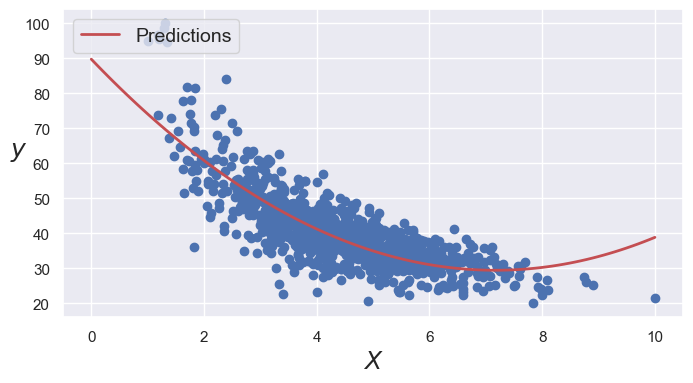

In [2924]:
X_fit = np.linspace(0, 10, 100).reshape(100,1)
polyX_fit = poly_transform.fit_transform(X_fit)
polyX_fit
y_fit = poly_regression.predict(polyX_fit)

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [2925]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

Error medio Absoluto (MAE): 4.538765565228896
Root Mean Squared Error: 6.129173450227568
r2_score 0.6650268116056028


Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
Regresión Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
Finalmente grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)
Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

In [2926]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
282,3.721616,41.496755
837,5.684718,35.075195
807,5.563938,30.078892
948,6.717593,31.416783
161,3.133644,56.183945
234,3.480362,45.066258
957,6.865924,27.901113
974,7.182430,31.221577
479,4.351203,40.618167
414,4.186185,48.143612


In [2927]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [2928]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos

## Regresion Lineal

In [2929]:
X_train.shape

(800, 1)

In [2930]:
y_train.shape

(800,)

In [2931]:
y_test.shape

(200,)

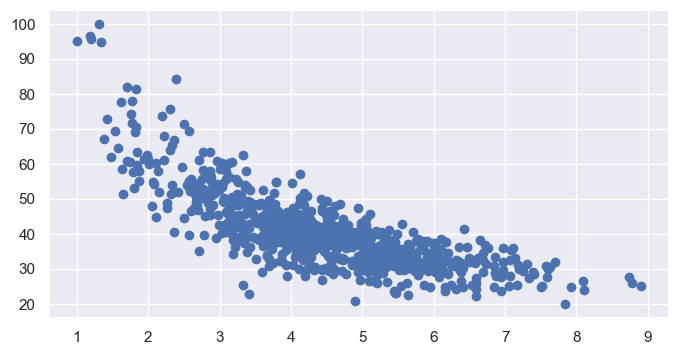

In [2932]:
##datos sin entrenamiento
plt.scatter(X_train, y_train);

In [2933]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


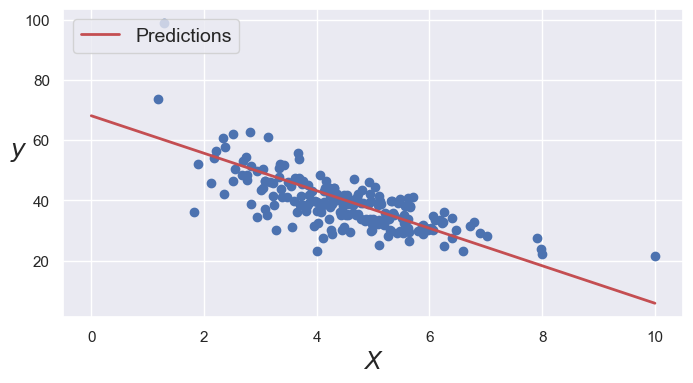

In [2934]:
## con lo que tenemos como train vamos a entrenar el linear
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [2935]:
linear_reg.coef_

array([-6.22263745])

In [2936]:
linear_reg.intercept_

68.08187672497847

In [2937]:
y_pred = linear_reg.predict(X_train)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
linear_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score', r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.983664639039784
Root Mean Squared Error: 6.930601695798021
r2_score 0.594243664202029


In [2938]:
y_pred = linear_reg.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae=metrics.mean_absolute_error(y_test,y_pred)
linear_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))


Error medio Absoluto (MAE): 4.8332411439887215
Root Mean Squared Error: 6.668203882750842
r2_score 0.4843996957799934


##Conclusion Regresion Lineal

El uso de la regresion logistica es muy mala idea para este modelo los datos estan muy alejados de lo esperado y al ver el nivel de entramiento no es muy bueno , vemos com reaccion el mismo ejercicio pero con el poliomial el cual esperamos mucho mejor comporatmiento

## Regresion polinomial

In [2939]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos

In [2940]:
y_train.shape

(800,)

In [2941]:
y_test.shape

(200,)

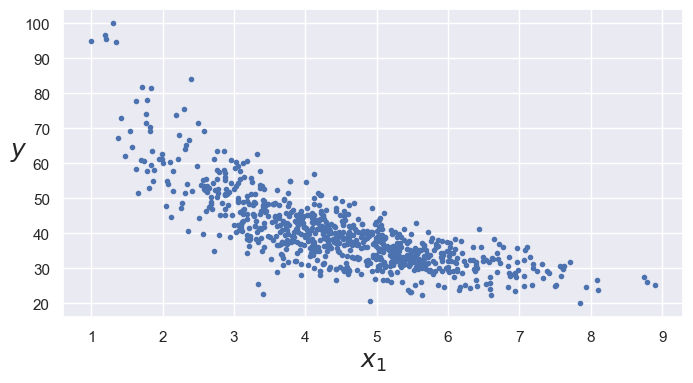

In [2942]:
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

In [2943]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_train)
polyX

array([[  5.65669179,  31.99816198, 181.00374013],
       [  5.53635996,  30.65128163, 169.69652839],
       [  2.25713058,   5.09463847,  11.49926431],
       ...,
       [  2.64655085,   7.00423138,  18.53705446],
       [  5.18000789,  26.83248172, 138.99246696],
       [  6.37652342,  40.66005096, 259.26976735]])

In [2944]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX, y_train)

LinearRegression()

In [2945]:
poly_regression.coef_

array([-35.3746951 ,   5.28612952,  -0.28112892])

In [2946]:
poly_regression.intercept_

115.22180379591052

In [2947]:
poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_train)

In [2948]:
y_pred = poly_regression.predict(polyX)

In [2949]:

from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
Poly_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred ))

Error medio Absoluto (MAE): 4.462630935588185
Root Mean Squared Error: 5.858467673318268
r2_score 0.7100711021026239


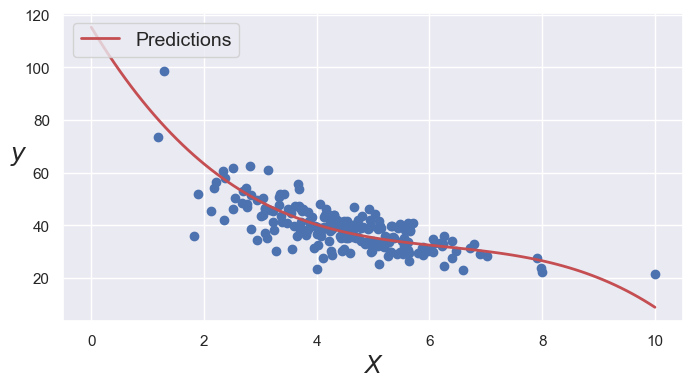

In [2950]:
X_fit = np.linspace(0, 10, 100).reshape(100,1)
polyX_fit = poly_transform.fit_transform(X_fit)
polyX_fit
y_fit = poly_regression.predict(polyX_fit)

plt.scatter(X_test, y_test)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [2951]:
y_pred.shape

(800,)

In [2952]:
y_train.shape

(800,)

In [2953]:
poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_test)
y_pred = poly_regression.predict(polyX)

In [2954]:

from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae=metrics.mean_absolute_error(y_test,y_pred)
Poly_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.6058129615114
Root Mean Squared Error: 6.2099995227061955
r2_score 0.5528239263527266


### Ridge

In [2955]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos

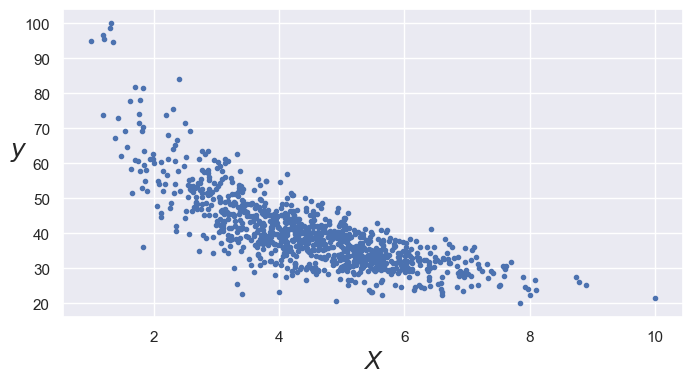

In [2956]:
plt.plot(X, y,"b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

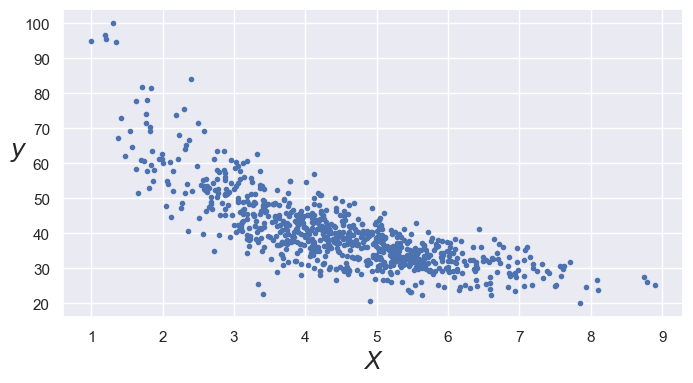

In [2957]:
plt.plot(X_train, y_train,"b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

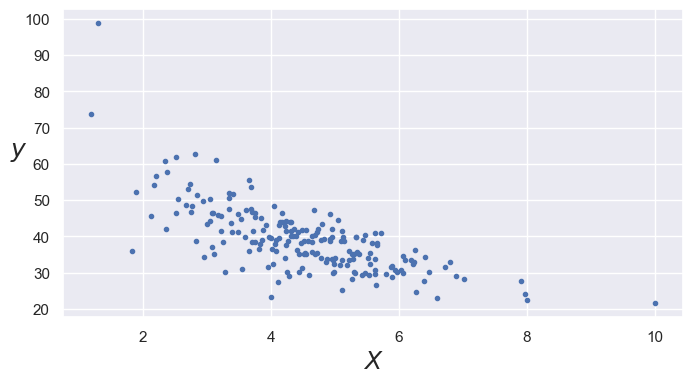

In [2958]:
plt.plot(X_test, y_test,"b.")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18);

In [2959]:
X_train.shape, y_train.shape

((800, 1), (800,))

In [2960]:
X_train2=X_train.to_numpy().reshape(-1,1)

In [2961]:
# better
model = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [2962]:
y_pred = model.predict(X_test)

In [2963]:
order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

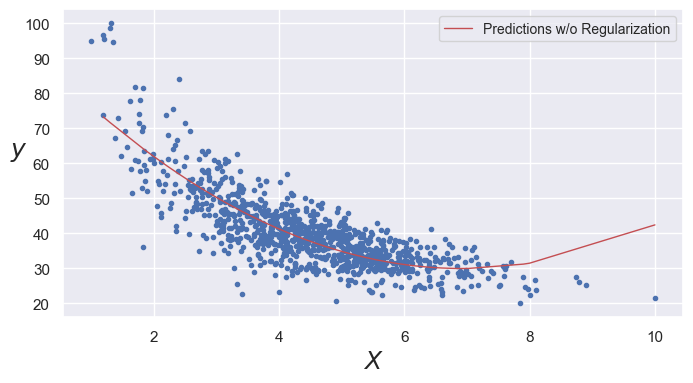

In [2964]:
plt.plot(X, y, "b.")
plt.plot(X_test2, y_pred2, "r-", linewidth=1, label="Predictions w/o Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [2965]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha=1, solver = 'cholesky', random_state = 42,max_iter=1000))])
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge',
                 Ridge(alpha=1, max_iter=1000, random_state=42,
                       solver='cholesky'))])

In [2966]:
y_pred = model_ridge.predict(X_train)
Ridge_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
Ridge_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score', r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.453130806314611
Root Mean Squared Error: 5.948178018959336
r2_score 0.7011237920037089


In [2967]:
y_pred = model_ridge.predict(X_test)

order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

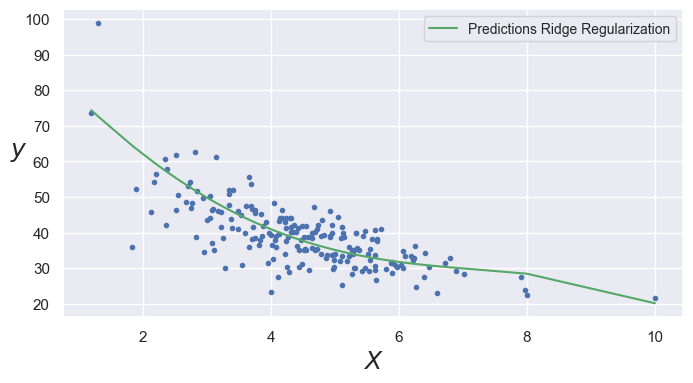

In [2968]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "g-",label="Predictions Ridge Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [2969]:
X_test=X_test.to_numpy().reshape(-1,1)
y_pred = model.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
Ridge_Mae=metrics.mean_absolute_error(y_test,y_pred)
Ridge_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.762293483795133
Root Mean Squared Error: 6.513768934466413
r2_score 0.508005642552175


C:\Users\oviwa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


    ### Lasso

In [2970]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)##dividimos los datos

In [2971]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = .9,random_state = 10,tol=0.1,max_iter=1000))])
model_lasso.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.9, random_state=10, tol=0.1))])

In [2972]:
y_pred = model_lasso.predict(X_train)

In [2973]:
Lasso_MAE_train=metrics.mean_absolute_error(y_train,y_pred)
Lasso_r2_train=r2_score(y_train,y_pred)

In [2974]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred ))

Error medio Absoluto (MAE): 4.8969775859486955
Root Mean Squared Error: 6.935898287947112
r2_score 0.5936232427341488


In [2975]:
y_pred = model_lasso.predict(X_test)

In [2976]:

order = np.argsort(X_test.values.ravel())
X_test2 = X_test.values.ravel()[order]
y_test2 = y_test.values[order]
y_pred2 = y_pred[order]

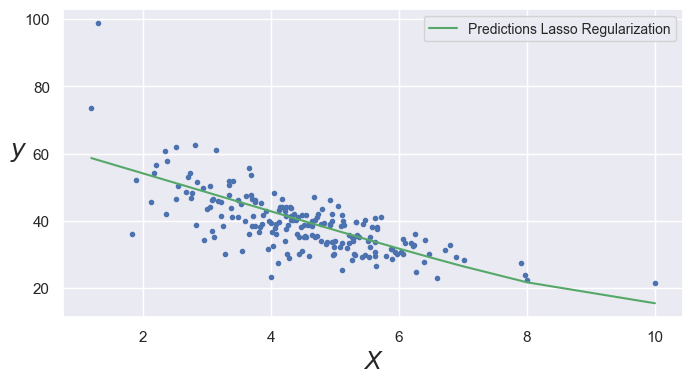

In [2977]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test2, y_pred2, "g-",label="Predictions Lasso Regularization")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper right", fontsize=10);

In [2978]:
y_pred = model_lasso.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
Lasso_MAE=metrics.mean_absolute_error(y_test,y_pred)
Lasso_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 4.646351122634725
Root Mean Squared Error: 6.486538755327113
r2_score 0.51211051393966


### Mae

In [2979]:
def diagramas(metricas):
    sumt=list()
    diagrama=metricas
    sumt.append(diagrama)
    return sumt

In [2980]:
Metricas = list()
Metricas.append('Lin train')
Metricas.append('Lin')
Metricas.append('Poly train')
Metricas.append('Poly')
Metricas.append('Ridge train')
Metricas.append('Ridge')
Metricas.append('Lasso train')
Metricas.append('Lasso')

In [2981]:
MAE = list()
MAE.append(linear_Mae_train)
MAE.append(linear_Mae)
MAE.append(Poly_Mae_train)
MAE.append(Poly_Mae)
MAE.append(Ridge_Mae_train)
MAE.append(Ridge_Mae)
MAE.append(Lasso_MAE_train)
MAE.append(Lasso_MAE)

In [2982]:
MAE

[4.983664639039784,
 4.8332411439887215,
 4.462630935588185,
 4.6058129615114,
 4.453130806314611,
 4.762293483795133,
 4.8969775859486955,
 4.646351122634725]

MAE
[4.983664639039784, 4.8332411439887215, 4.462630935588185, 4.6058129615114, 4.453130806314611, 4.762293483795133, 4.8969775859486955, 4.646351122634725]


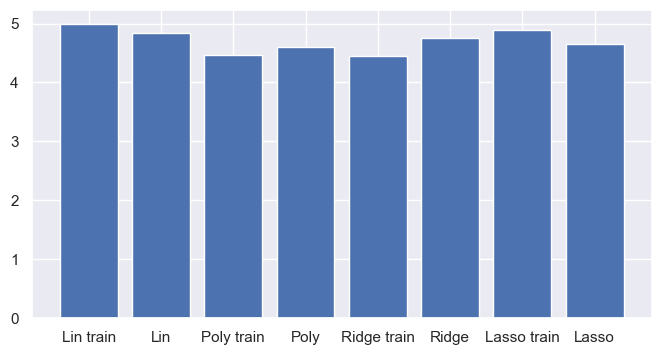

In [2983]:
fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)


plt.show()

### R2

In [2984]:
R2 = list()
R2.append(linear_r2_train)
R2.append(linear_r2)
R2.append(Poly_r2_train)
R2.append(Poly_r2)
R2.append(Ridge_r2_train)
R2.append(Ridge_r2)
R2.append(Lasso_r2_train)
R2.append(Lasso_r2)

r2
[0.594243664202029, 0.4843996957799934, 0.7100711021026239, 0.5528239263527266, 0.7011237920037089, 0.508005642552175, 0.5936232427341488, 0.51211051393966]


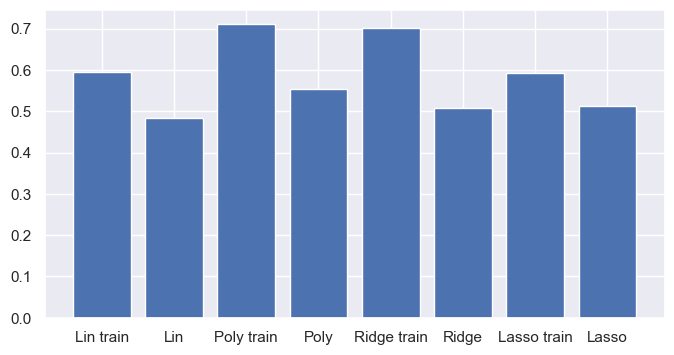

In [2985]:
fig, ax = plt.subplots(figsize =(8, 4))
print("r2")
print(R2)
R2=list(R2)
plt.bar(Metricas,R2)


plt.show()

### Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
Los MAE
Todos los modelos aplicados tienen en promedio el mismo Mae lo que nos dice que estamos aplicando los modelo en una de sus formas optimas sin embargo debemos tomar encuenta Tambien
los R2
Un valor de 1,0 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras, mientras que un valor de 0,0 indicaría que el cálculo no logra modelar los datos con precisión en absoluto.
Sin embargo como podemo observar en la grafica los modelos utilizados no estan pasando del .55 lo cualnos idica que solo podremos predecir el 55% de los casos de

para tener un mejor modelo deberiamos hacer N cantidad de pruebas con los parametros, podemos usar un gridSEarch para encontrar los mejor parametros para correr y que l modelo sea mas optimo para los datos

Un dato interesante que podemos ver en el ejercicio es que el  modelo se acopal correctamente a los datos de train pero al correr los de Test el sistema tiene una menor rendimiento que es lo que podemos ver en la graficas finales que ejemplifican el resultado final de TEST vs train




#Ejercicio 2
Casas en King Country

In [2986]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2009,2472930270,20140905T000000,485000.0,3,2.50,3110,9015,2.0,0,0,...,9,3110,0,1990,0,98058,47.4369,-122.147,2650,8960
10935,2141500070,20140619T000000,450000.0,4,2.50,2400,7693,2.0,0,0,...,8,2400,0,2003,0,98059,47.4881,-122.142,2400,8038
21496,1283800110,20140506T000000,776000.0,4,2.50,3040,6425,2.0,0,0,...,8,3040,0,2008,0,98052,47.6788,-122.117,3040,7800
15805,3904901300,20150414T000000,468000.0,3,2.25,1470,5597,2.0,0,0,...,7,1470,0,1985,0,98029,47.5674,-122.019,1610,5217
9578,3204300625,20140903T000000,785950.0,4,3.00,2530,4560,1.5,0,0,...,7,1540,990,1925,2014,98112,47.6287,-122.300,1640,4560
19889,1776460140,20140724T000000,395000.0,3,2.50,2130,5088,2.0,0,0,...,8,1840,290,2011,0,98019,47.7329,-121.976,2130,5762
5076,5100402764,20150415T000000,740000.0,3,1.00,1230,6380,1.5,0,0,...,7,1230,0,1927,0,98115,47.6947,-122.315,1250,6380
235,1762600320,20140610T000000,1025000.0,5,4.00,3760,28040,2.0,0,0,...,10,3760,0,1983,0,98033,47.6489,-122.183,3430,35096
3381,7854800090,20141107T000000,799950.0,3,3.00,2900,11769,2.0,0,0,...,10,2900,0,1997,0,98052,47.6993,-122.118,2900,9611
12893,1431600180,20150403T000000,335000.0,5,3.00,2660,7700,1.5,0,0,...,7,1670,990,1962,0,98058,47.4600,-122.174,1610,7700


In [2987]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [2988]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [2989]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


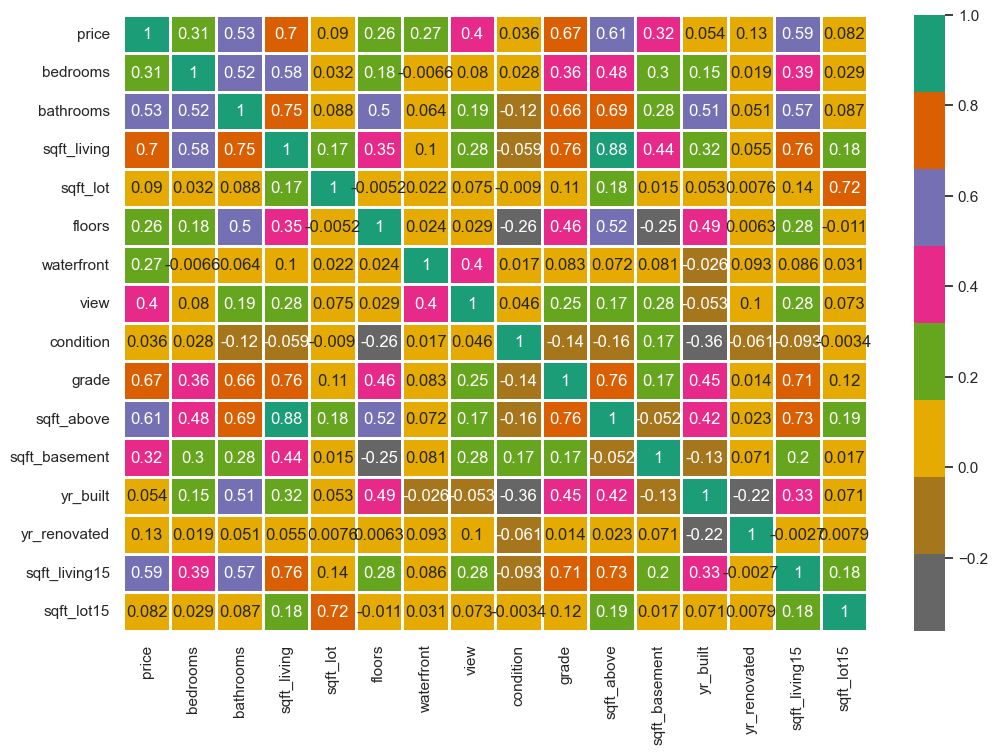

In [2990]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [2991]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [2992]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


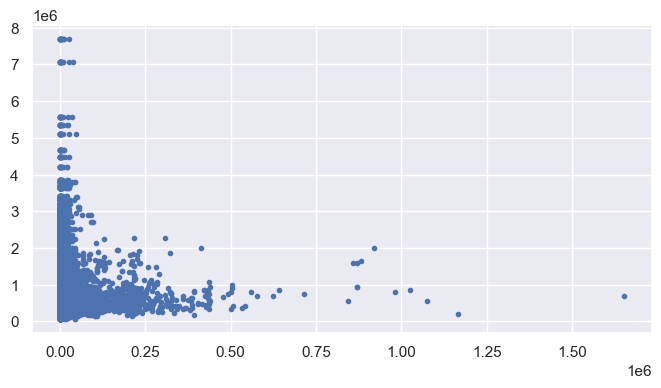

In [2993]:
plt.plot(X_train,y_train,'b.')
plt.show()

In [2994]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

In [2995]:
 linear_reg.coef_,

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750272e+01,  6.02175567e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),)

In [2996]:
linear_reg.intercept_

array([6151359.26274133])

The model estimates:

### calculate the ecuation is complicated due to the 15 parameter on the X

In [2997]:
y_pred = linear_reg.predict(X_train)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
linear_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score', r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 139269.32939115047
Root Mean Squared Error: 214234.8822754647
r2_score 0.6529196653133833


In [2998]:
y_pred = linear_reg.predict(X_test)
from sklearn import metrics
from sklearn.metrics import r2_score
linear_Mae=metrics.mean_absolute_error(y_test,y_pred)
linear_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score', r2_score(y_test, y_pred))


Error medio Absoluto (MAE): 137480.13882731603
Root Mean Squared Error: 232133.36762408566
r2_score 0.6579723205007496


Polinomial

In [2999]:
from sklearn.preprocessing import PolynomialFeatures

poly_transform = PolynomialFeatures(degree=3, include_bias = False)
polyX = poly_transform.fit_transform(X_train)
polyX

array([[5.00000000e+00, 2.75000000e+00, 3.75000000e+03, ...,
        7.06230720e+10, 1.64221278e+11, 3.81867106e+11],
       [4.00000000e+00, 4.50000000e+00, 5.25000000e+03, ...,
        3.02200000e+11, 5.84478976e+12, 1.13042910e+14],
       [3.00000000e+00, 2.50000000e+00, 2.88000000e+03, ...,
        9.21194624e+10, 3.27210820e+11, 1.16226168e+12],
       ...,
       [3.00000000e+00, 2.25000000e+00, 1.78000000e+03, ...,
        1.73857625e+10, 8.77923438e+10, 4.43322266e+11],
       [2.00000000e+00, 1.00000000e+00, 1.15000000e+03, ...,
        9.24639408e+09, 2.73030912e+10, 8.06215680e+10],
       [3.00000000e+00, 1.00000000e+00, 1.45000000e+03, ...,
        8.37158400e+09, 6.23039040e+10, 4.63684824e+11]])

In [3000]:
poly_regression = LinearRegression(fit_intercept=True)
poly_regression.fit(polyX, y_train)
poly_regression.intercept_

array([22303152.33754259])

In [3001]:
poly_regression.coef_

array([[-2.61095885e+02,  1.94799681e+01,  7.36856487e+01,
         3.44355280e-03, -5.53722248e+01, -1.19147437e+01,
        -1.33611969e+00,  3.99586651e-01,  9.01854617e-02,
         2.05705202e+00,  9.66689402e-01, -5.41798467e-02,
        -1.44814417e+00, -1.19376403e+00, -1.85682858e+01,
         1.40245749e+00, -1.92334700e-01, -1.15860409e+01,
        -6.07776034e+00,  1.75337027e-01,  4.60366656e-01,
         1.08006405e-01,  1.16516393e+00,  1.13251999e+00,
        -1.46933663e+01,  3.40151878e+00,  3.72667095e+02,
         3.97643611e+00, -1.40007329e+01, -2.50779267e+01,
        -2.71001582e-01, -1.28754891e+02, -5.90497228e+01,
        -4.46752199e-01, -6.42874131e-02, -6.94370006e-02,
        -3.77644274e-02, -3.22683502e-01, -1.03608388e+02,
        -2.51332572e+01, -1.06388577e+02, -2.50039286e+00,
        -1.03861608e+02,  8.64936649e+01, -3.72865019e-01,
         2.88501059e-02, -3.33200797e+02, -2.07333618e+01,
        -5.29072204e+01,  1.32423533e+02,  1.09155914e+0

Making the ecuation is complicated due to the amount of x components

In [3002]:
polyX = poly_transform.fit_transform(X_train)
polyX
y_pred = poly_regression.predict(polyX)
from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae_train=metrics.mean_absolute_error(y_train,y_pred)
Poly_r2_train=r2_score(y_train,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score',r2_score(y_train, y_pred ))

Error medio Absoluto (MAE): 141530.9591213192
Root Mean Squared Error: 213038.105726498
r2_score 0.6567866116524821


In [3003]:
polyX = poly_transform.fit_transform(X_test)
polyX
y_pred = poly_regression.predict(polyX)

In [3004]:
from sklearn import metrics
from sklearn.metrics import r2_score
Poly_Mae=metrics.mean_absolute_error(y_test,y_pred)
Poly_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 149110.84568448795
Root Mean Squared Error: 267502.30518914235
r2_score 0.5458062351742023


### Ridge

In [3005]:
X_train2=X_train.to_numpy().reshape(-1,1)

In [3006]:
model = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("linear_reg", LinearRegression())])
model.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [3007]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 5, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=5, random_state=42, solver='cholesky'))])

In [3008]:
y_pred = model.predict(X_train)
from sklearn import metrics
from sklearn.metrics import r2_score

Ridge_Mae_train = metrics.mean_absolute_error(y_train, y_pred)
Ridge_r2_train = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score', r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 123196.96131401205
Root Mean Squared Error: 182926.38521672378
r2_score 0.7469523304447205


In [3009]:
y_pred = model.predict(X_test)

In [3010]:
from sklearn import metrics
from sklearn.metrics import r2_score
Ridge_Mae=metrics.mean_absolute_error(y_test,y_pred)
Ridge_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 121317.06614912253
Root Mean Squared Error: 186260.82904512723
r2_score 0.7797939871361215


### Lasso

In [3011]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
                        ("scaler", StandardScaler()),
                        ("lasso", Lasso(alpha = 1, random_state = 42,tol=0.1,max_iter=1000))])


model_lasso.fit(X_train, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42, tol=0.1))])

In [3012]:
y_pred = model_lasso.predict(X_train)
from sklearn import metrics
from sklearn.metrics import r2_score

Lasso_MAE_train = metrics.mean_absolute_error(y_train, y_pred)
Lasso_r2_train= r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))
print('r2_score', r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 113884.60002386104
Root Mean Squared Error: 162623.20298801802
r2_score 0.8000070629856828


In [3013]:
y_pred = model_lasso.predict(X_test)

In [3014]:
from sklearn import metrics
from sklearn.metrics import r2_score
Lasso_MAE=metrics.mean_absolute_error(y_test,y_pred)
Lasso_r2=r2_score(y_test,y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred ))

Error medio Absoluto (MAE): 127385.8598537924
Root Mean Squared Error: 254950.23977556525
r2_score 0.5874306511507237


In [3015]:
def diagramas(metricas):
    sumt=list()
    diagrama=metricas
    sumt.append(diagrama)
    return sumt

In [3016]:
Metricas = list()
Metricas.append('Lin train')
Metricas.append('Lin')
Metricas.append('Poly train')
Metricas.append('Poly')
Metricas.append('Ridge train')
Metricas.append('Ridge')
Metricas.append('Lasso train')
Metricas.append('Lasso')

In [3017]:
MAE = list()
MAE.append(linear_Mae_train)
MAE.append(linear_Mae)
MAE.append(Poly_Mae_train)
MAE.append(Poly_Mae)
MAE.append(Ridge_Mae_train)
MAE.append(Ridge_Mae)
MAE.append(Lasso_MAE_train)
MAE.append(Lasso_MAE)

MAE
[139269.32939115047, 137480.13882731603, 141530.9591213192, 149110.84568448795, 123196.96131401205, 121317.06614912253, 113884.60002386104, 127385.8598537924]


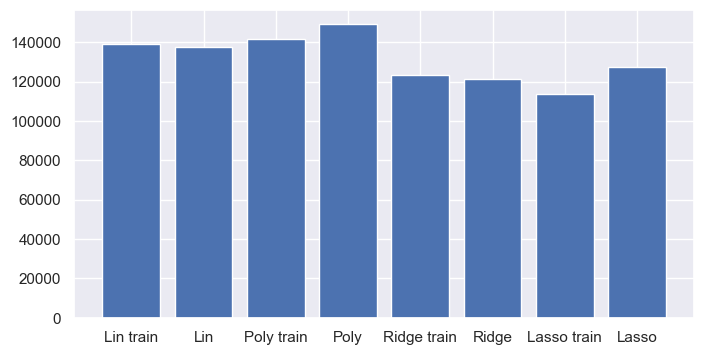

In [3018]:
fig, ax = plt.subplots(figsize =(8, 4))
print("MAE")
print(MAE)
Metricas=list(Metricas)
MAE=list(MAE)
plt.bar(Metricas,MAE)


plt.show()

r2
[0.6529196653133833, 0.6579723205007496, 0.6567866116524821, 0.5458062351742023, 0.7469523304447205, 0.7797939871361215, 0.8000070629856828, 0.5874306511507237]


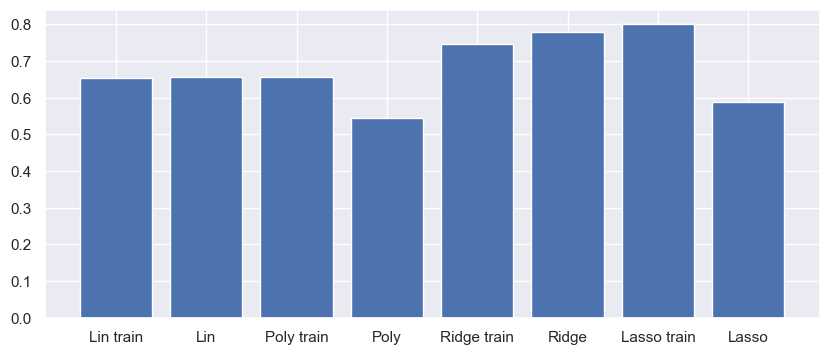

In [3019]:
R2 = list()
R2.append(linear_r2_train)
R2.append(linear_r2)
R2.append(Poly_r2_train)
R2.append(Poly_r2)
R2.append(Ridge_r2_train)
R2.append(Ridge_r2)
R2.append(Lasso_r2_train)
R2.append(Lasso_r2)
fig, ax = plt.subplots(figsize=(10, 4))
print("r2")
print(R2)
R2 = list(R2)
plt.bar(Metricas, R2)

plt.show()

En este sistema podemos ver que el entrenamiento y  el training si estan funcioando para el caso ridge donde el training funcioana ya que el test nodarroja una R2 de casi 80% por eso mismo yo me quedaria con el ridge m aunque cuando vemos el Lasso tiene un trainig de 80 al avelauar ya con los datos de tes vemos que el modelo esta subentrenado
